In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('fraud_detection.csv') # loading then file

In [3]:
df # displaying the file

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1,1,0,1,1,0,Laborers,1.0,2,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,1,0,1,1,0,Core staff,2.0,1,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1,1,1,1,1,0,Laborers,1.0,2,2
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,1,1,0,1,0,0,Laborers,2.0,2,2
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1,1,0,1,0,0,Core staff,1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,1,1,0,1,0,0,Sales staff,1.0,1,1
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,1,0,0,1,1,0,NaN,1.0,2,2
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,1,1,0,1,0,1,Managers,1.0,3,3
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,1,1,0,1,0,0,Laborers,2.0,2,2


In [4]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,9.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,3.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [6]:
corr=df.corr(numeric_only=True)
#corr=df.select_dtypes(include=['float64','int64'])

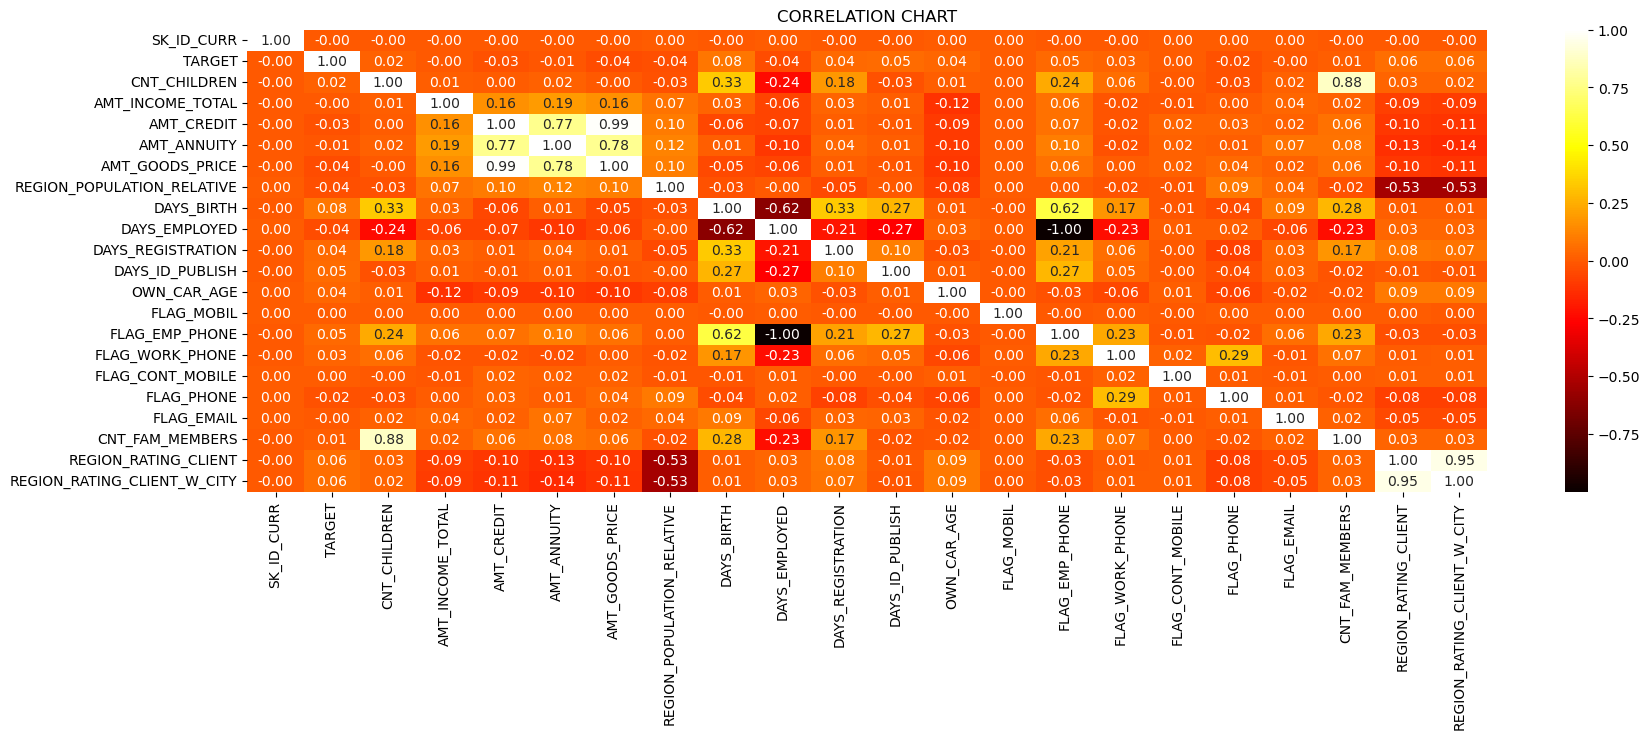

In [7]:
plt.figure(figsize=(20,6))
sns.heatmap(corr,annot=True,cmap='hot',fmt=".2f")
plt.title('CORRELATION CHART')
plt.show()

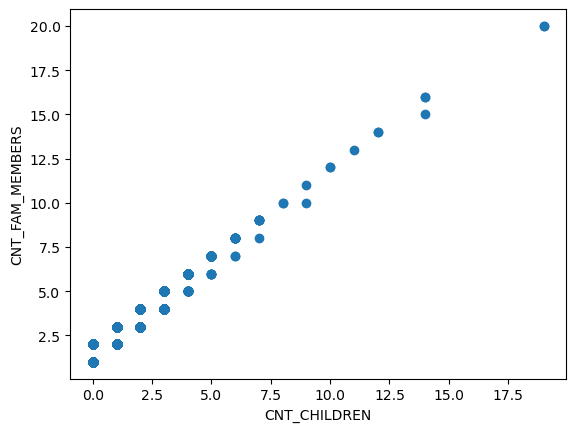

From the correlation chart we can understand that 'CNT_CHILDREN' and 'CNT_FAM_MEMBERS' are highly correlated


In [8]:
plt.scatter(df['CNT_CHILDREN'],df['CNT_FAM_MEMBERS'])
plt.xlabel('CNT_CHILDREN')
plt.ylabel('CNT_FAM_MEMBERS')
plt.show()
print("From the correlation chart we can understand that 'CNT_CHILDREN' and 'CNT_FAM_MEMBERS' are highly correlated")

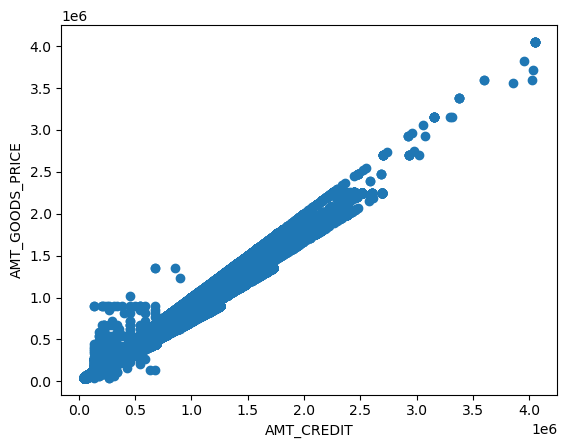

From the correlation chart we can understand that 'AMT_CREDIT' and 'AMT_GOODS_PRICE' are highly correlated


In [9]:
plt.scatter(df['AMT_CREDIT'],df['AMT_GOODS_PRICE'])
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_GOODS_PRICE')
plt.show()
print("From the correlation chart we can understand that 'AMT_CREDIT' and 'AMT_GOODS_PRICE' are highly correlated")

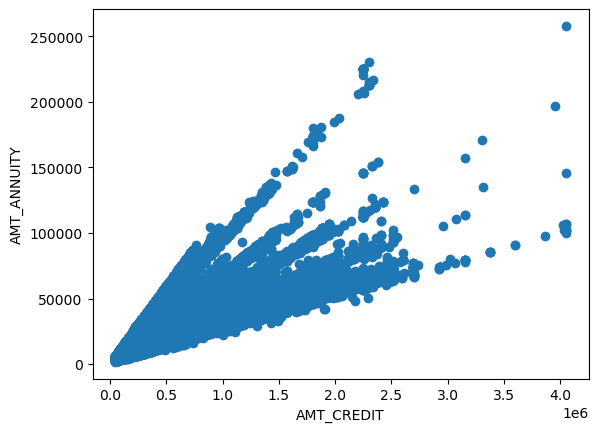

From the correlation chart we can understand that 'AMT_CREDIT' and 'AMT_ANNUITY ' are highly correlated


In [10]:
plt.scatter(df['AMT_CREDIT'],df['AMT_ANNUITY'])
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_ANNUITY')
plt.show()
print("From the correlation chart we can understand that 'AMT_CREDIT' and 'AMT_ANNUITY ' are highly correlated")

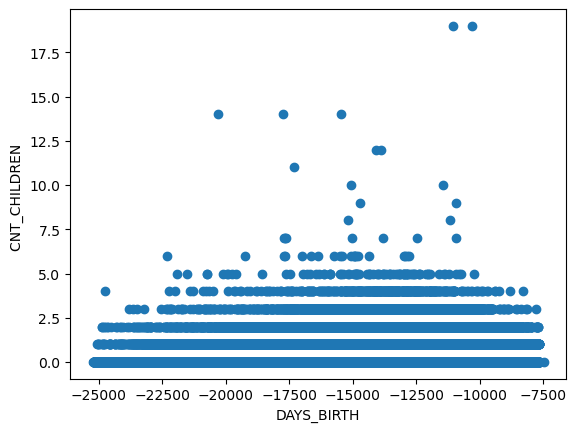

From the correlation chart we can understand that 'DAYS_BIRTH' and 'CNT_CHILDREN ' are correlated


In [11]:
plt.scatter(df['DAYS_BIRTH'],df['CNT_CHILDREN'])
plt.xlabel('DAYS_BIRTH')
plt.ylabel('CNT_CHILDREN ')
plt.show()
print("From the correlation chart we can understand that 'DAYS_BIRTH' and 'CNT_CHILDREN ' are correlated")

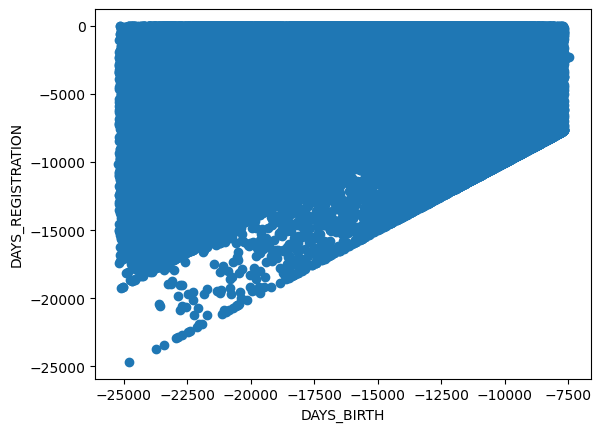

From the correlation chart we can understand that 'DAYS_BIRTH' and 'DAYS_REGISTRATION' are highly correlated


In [12]:
plt.scatter(df['DAYS_BIRTH'],df['DAYS_REGISTRATION'])
plt.xlabel('DAYS_BIRTH')
plt.ylabel('DAYS_REGISTRATION')
plt.show()


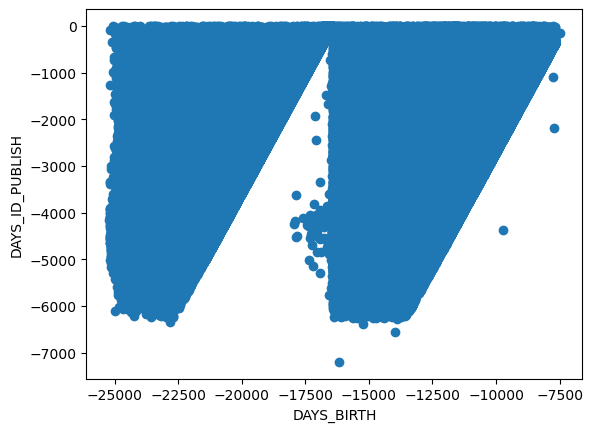

From the correlation chart we can understand that 'DAYS_BIRTH' and 'DAYS_ID_PUBLISH' are highly correlated


In [13]:
plt.scatter(df['DAYS_BIRTH'],df['DAYS_ID_PUBLISH'])
plt.xlabel('DAYS_BIRTH')
plt.ylabel('DAYS_ID_PUBLISH')
plt.show()


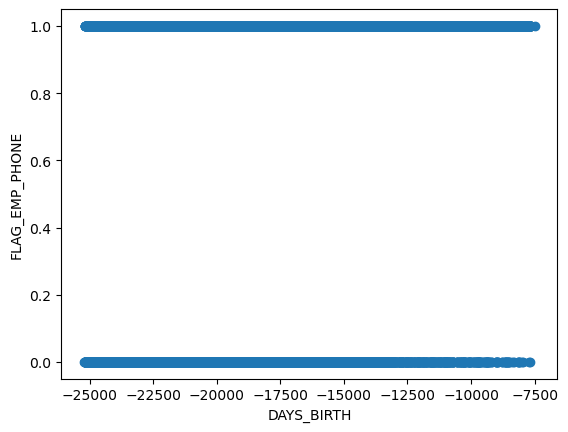

From the correlation chart we can understand that 'DAYS_BIRTH' and 'FLAG_EMP_PHONE' are negativley correlated


In [14]:
plt.scatter(df['DAYS_BIRTH'],df['FLAG_EMP_PHONE'])
plt.xlabel('DAYS_BIRTH')
plt.ylabel('FLAG_EMP_PHONE')
plt.show()

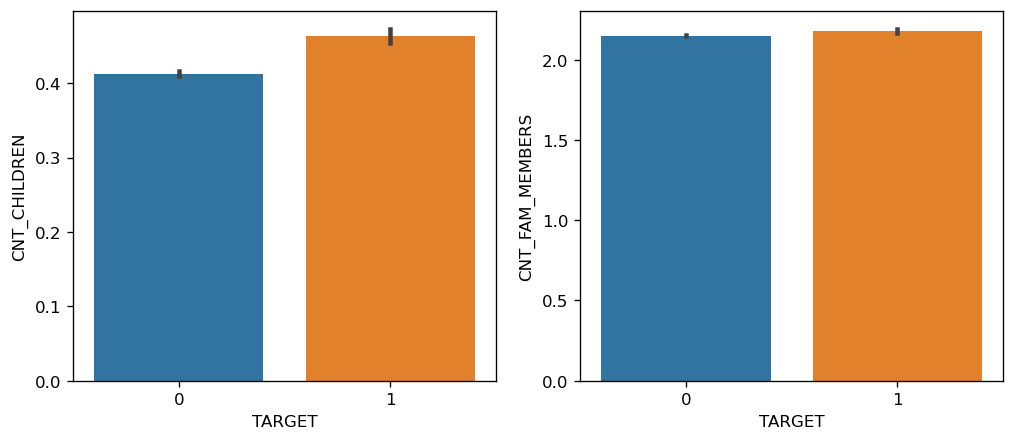

In [15]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=[10,4],dpi=120)
sns.barplot(df,x='TARGET',y='CNT_CHILDREN',ax=axs[0])
sns.barplot(df,x='TARGET',y='CNT_FAM_MEMBERS',ax=axs[1])
plt.show()
